# Confidence intervals

In this notebook, we look at the confidence interval methods in `resample`. We try them on the median of an exponential distribution.

In [1]:
import numpy as np
from resample.bootstrap import confidence_interval as ci, bootstrap
import matplotlib.pyplot as plt

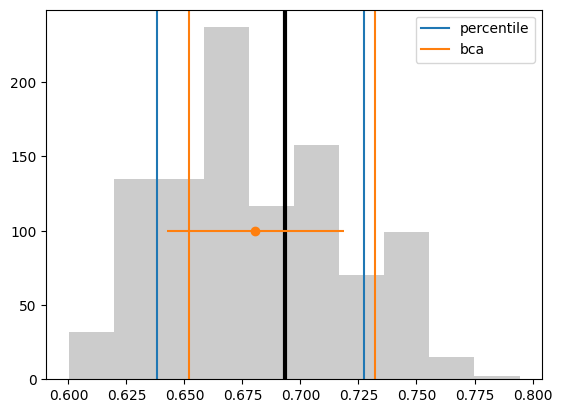

In [2]:
rng = np.random.default_rng(1)

# generate data
data = rng.exponential(size=1000)

# generate confidence intervals
cis = {
    m: ci(np.median, data, cl=0.68, size=100, ci_method=m, random_state=rng)
    for m in ("percentile", "bca")
}

# compute mean and std. deviation of replicates
rep = bootstrap(np.median, data, size=1000, random_state=rng)
mr = np.mean(rep)
sr = np.std(rep)

# draw everything
for i, (m, v) in enumerate(cis.items()):
    for j in (0, 1):
        plt.axvline(v[j], color=f"C{i}", label=m if j == 0 else None)

plt.hist(rep, facecolor="0.8")
plt.axvline(np.log(2), lw=3, color="k")
plt.errorbar(mr, 100, 0, sr, fmt="o") 
plt.legend();

The mean of the replicates and its standard deviation is shown with the dot and the horizontal error bar. The three interval methods are shown as thin vertical lines. The thick black line is the true value of the median for an exponential distribution.